In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [92]:
data = pd.read_csv("gestures3.csv")

In [93]:
data.head()

,wrist_y,palm_center_y,thumb_y,index_y,middle_y,ring_y,pinky_y,target
0,0.636178,0.555995,0.574688,0.510982,0.589794,0.639872,0.681020,left
1,0.655754,0.568450,0.583999,0.520278,0.600889,0.649576,0.693260,left
2,0.644441,0.554956,0.580864,0.510056,0.593543,0.640469,0.683117,left
3,0.631938,0.545628,0.564051,0.500018,0.590557,0.633844,0.676950,left
4,0.623736,0.533564,0.568559,0.490874,0.581730,0.619657,0.661414,left


In [94]:
data.dtypes

wrist_y          float64
palm_center_y    float64
thumb_y          float64
index_y          float64
middle_y         float64
ring_y           float64
pinky_y          float64
target            object
dtype: object

In [96]:
r = pd.read_csv("right.csv")

In [78]:
lr = pd.read_csv("left+right.csv")

In [79]:
lr.shape

(1845, 8)

In [97]:
data_all = pd.concat([data, lr, r])

In [98]:
data_all.shape

(12189, 8)

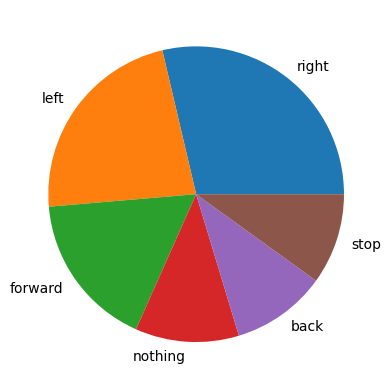

In [99]:
plt.pie(data_all.target.value_counts(), labels=data_all.target.value_counts().index);

In [100]:
model = CatBoostClassifier()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("target", axis=1), data.target, test_size=0.1, random_state=42, stratify=data.target
)

In [102]:
model.fit(X_train, y_train, verbose=False)

In [103]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

        back       1.00      0.99      1.00       127
     forward       0.90      0.96      0.93       207
        left       0.88      0.92      0.89       200
     nothing       0.97      0.86      0.91       138
       right       0.83      0.85      0.84       171
        stop       0.94      0.87      0.90       121

    accuracy                           0.91       964
   macro avg       0.92      0.91      0.91       964
weighted avg       0.91      0.91      0.91       964



In [ ]:
model = CatBoostClassifier()
model.fit(data.drop("target", axis=1), data.target, verbose=False)

In [ ]:
import pickle
with open("model6.bf", "wb") as file:
    pickle.dump(model, file)

In [107]:
model_l = LogisticRegression()
model_l.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
print(classification_report(y_test, model_l.predict(X_test)))

              precision    recall  f1-score   support

        back       0.98      0.99      0.98       127
     forward       0.62      0.85      0.72       207
        left       0.50      0.59      0.54       200
     nothing       0.67      0.61      0.64       138
       right       0.40      0.29      0.34       171
        stop       0.77      0.38      0.51       121

    accuracy                           0.62       964
   macro avg       0.65      0.62      0.62       964
weighted avg       0.63      0.62      0.61       964



In [131]:
model = CatBoostClassifier(verbose=10, learning_rate=0.1)
model.fit(X_train, y_train)

0:	learn: 1.6670184	total: 6.08ms	remaining: 6.08s
10:	learn: 1.2188927	total: 49.6ms	remaining: 4.46s
20:	learn: 1.0591885	total: 91.3ms	remaining: 4.25s
30:	learn: 0.9674644	total: 136ms	remaining: 4.26s
40:	learn: 0.8987948	total: 173ms	remaining: 4.05s
50:	learn: 0.8464289	total: 214ms	remaining: 3.98s
60:	learn: 0.8040664	total: 253ms	remaining: 3.9s
70:	learn: 0.7659377	total: 294ms	remaining: 3.84s
80:	learn: 0.7365439	total: 329ms	remaining: 3.74s
90:	learn: 0.7100840	total: 366ms	remaining: 3.65s
100:	learn: 0.6825659	total: 402ms	remaining: 3.58s
110:	learn: 0.6620662	total: 439ms	remaining: 3.51s
120:	learn: 0.6358019	total: 476ms	remaining: 3.46s
130:	learn: 0.6148340	total: 514ms	remaining: 3.41s
140:	learn: 0.5955130	total: 550ms	remaining: 3.35s
150:	learn: 0.5789485	total: 590ms	remaining: 3.31s
160:	learn: 0.5619512	total: 626ms	remaining: 3.26s
170:	learn: 0.5430156	total: 663ms	remaining: 3.21s
180:	learn: 0.5328077	total: 700ms	remaining: 3.17s
190:	learn: 0.5204074

In [132]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

        back       1.00      0.99      1.00       127
     forward       0.90      0.96      0.93       207
        left       0.88      0.93      0.90       200
     nothing       0.98      0.88      0.93       138
       right       0.83      0.85      0.84       171
        stop       0.95      0.86      0.90       121

    accuracy                           0.91       964
   macro avg       0.92      0.91      0.92       964
weighted avg       0.92      0.91      0.91       964

